In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
import os

C:\Users\stefa\anaconda3\envs\CitiBike\Lib\site-packages\keplergl\keplergl.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [2]:
path = r"C:\Users\stefa\CitiBike"

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'CitiBikeWeatherWrangled.csv'),  index_col = False)

In [4]:
df.dtypes

date                    object
ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
average_tempurature    float64
bike_rides_daily         int64
_merge                  object
dtype: object

In [5]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [6]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']
    ]

In [7]:
df.shape

(895485, 19)

Step 3: Use plotly to produce a bar chart for the most popular stations in New York. Consider the chart layout and use what you’ve learned to customize its design.

In [8]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

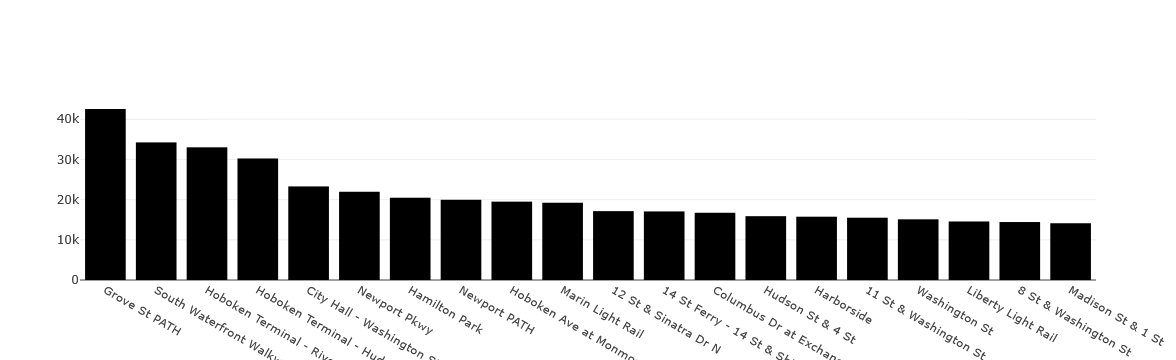

In [9]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

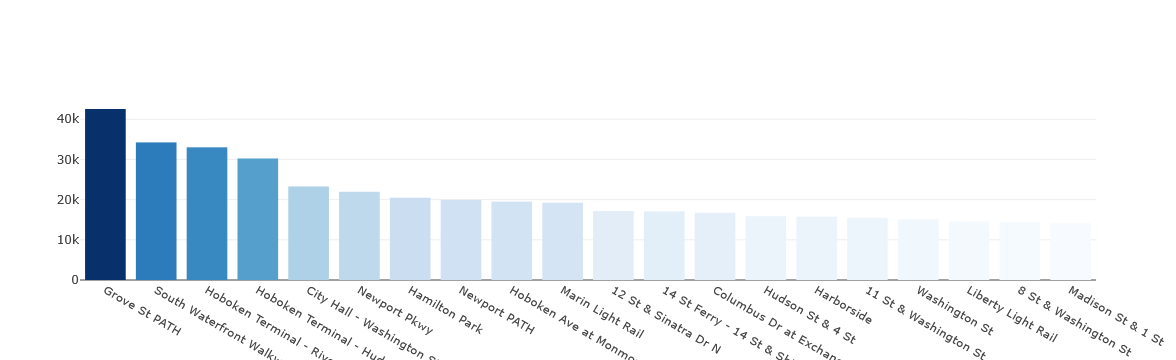

In [10]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

In [11]:
df_1 = df.drop(columns = {'started_at', 'ended_at', 'ride_id', 'start_station_id', 'end_station_id','_merge'})

In [12]:
df_1.dtypes

date                   datetime64[ns]
rideable_type                  object
start_station_name             object
end_station_name               object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
average_tempurature           float64
bike_rides_daily                int64
month                           int64
season                         object
value                           int64
dtype: object

In [13]:
## line chart 

fig_2 = make_subplots(specs=[[{"secondary_y": True}]])

fig_2.add_trace(
go.Scatter(x = df_1['date'], y = df_1['bike_rides_daily'], name = 'Daily bike rides', marker={'color': 'blue'}), secondary_y = False)

fig_2.add_trace(
go.Scatter(x=df_1['date'], y=df_1['average_tempurature'], name='Daily temperature', marker={'color': 'red'}), secondary_y=True)

fig_2.update_layout
title = 'Top 20 most popular bike stations in New York', 
xaxis_title = 'Start stations',
yaxis_title = 'Sum of trips'
height = 800

st.plotly_chart(fig_2, width=True)

2025-11-17 14:18:32.144 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-17 14:18:32.163 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-17 14:18:32.336 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-17 14:18:33.091 
  command:

    streamlit run C:\Users\stefa\anaconda3\envs\CitiBike\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-17 14:18:33.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-17 14:18:33.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()